# Deviation Clustering

## Libraries

In [65]:
import numpy as np
import seaborn as sns
from statistics import stdev
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE

## Functions

* **devclust function**: takes an array and chronologically clusters it based on a threshold value assumed to a standard deviation

* **blocknumber function**: takes an array and returns the number of chronological clusters it has



In [66]:
def devclust(load, sigma): 
  
  # initialize output cluster array
  y=[] 

  # iterat over time horizon
  for t in range(len(load)):

    # check pairwise std of input elements below threshold
    if len(y) > 0 and stdev([load[t-1], load[t]]) < sigma:

      # sustain load level if no violation
      y.append(y[t-1])

      # sudo ouput ignoring last element         
      y2 = y[:-1]

      # add current element of input to sudo output
      y2.append(load[t])

      # check pairwise std of output and sudo output elements above threshold
      if stdev([y[t], y2[t]]) > sigma:

        # swap output with sudo output if violation
        y = y2          
  
    # otherwise add current element of input to output
    else:
      y.append(load[t])     
  
  # return output cluster array
  return y


# returns number of blocks in each array
def blocknumber(arr): 
  c = 0
  for t in range(len(arr)):
    if len(arr) > 0 and arr[t] != arr[t-1]:
      c+=1
  return c 

## Devation Clustering
chronologically cluster load profile for the IEEE 18-bus for various sigma values

In [67]:
save_path = "/content/drive/MyDrive/Research/Conferences/DDDAS 2020/Code/Figures"

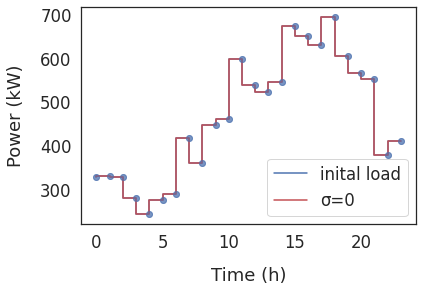

[328.61, 330.94, 328.88, 280.64, 242.38, 276, 290.14, 417.27, 360.62, 448.59, 461.31, 598.7, 538.38, 523.99, 545.54, 673.97, 650.76, 630.01, 696, 606.8, 567.48, 552.72, 377.69, 411.04]


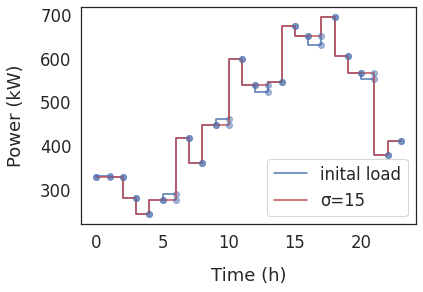

[328.61, 328.61, 328.61, 280.64, 242.38, 276, 276, 417.27, 360.62, 448.59, 448.59, 598.7, 538.38, 538.38, 545.54, 673.97, 650.76, 650.76, 696, 606.8, 567.48, 567.48, 377.69, 411.04]


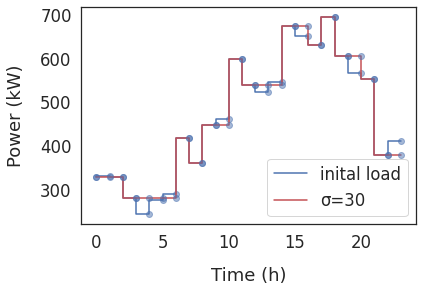

[328.61, 328.61, 328.61, 280.64, 280.64, 280.64, 280.64, 417.27, 360.62, 448.59, 448.59, 598.7, 538.38, 538.38, 538.38, 673.97, 673.97, 630.01, 696, 606.8, 606.8, 552.72, 377.69, 377.69]


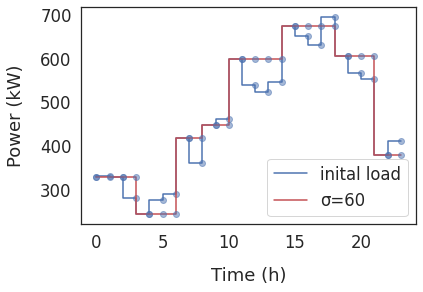

[328.61, 328.61, 328.61, 328.61, 242.38, 242.38, 242.38, 417.27, 417.27, 448.59, 448.59, 598.7, 598.7, 598.7, 598.7, 673.97, 673.97, 673.97, 673.97, 606.8, 606.8, 606.8, 377.69, 377.69]


In [68]:
# demand/load profile from the MATPOWER
IEEE_18 = [328.61, 330.94, 328.88, 280.64, 242.38, 276, 290.14, 417.27,
           360.62, 448.59, 461.31, 598.7, 538.38, 523.99, 545.54, 673.97,
           650.76, 630.01, 696, 606.8, 567.48, 552.72, 377.69, 411.04]


# defining the clustered profiles, blocks, and input error with threshold values
time  = np.arange(0,24)
sigma  = [0, 15, 30, 60]

# visulize input error in the demand/load profile 
for i in range(len(sigma)):
    
  # create figure
  fig = plt.figure()
    
  # inital load profile
  plt.step(time, devclust(IEEE_18, 0), label='inital load')                      
  plt.plot(time, devclust(IEEE_18, 0), 'C0o', alpha=0.5)
    
  # clustered load profile
  plt.step(time, devclust(IEEE_18, sigma[i]), 'r', label='\u03C3='+str(sigma[i]))
  plt.plot(time, devclust(IEEE_18, sigma[i]), 'C0o', alpha=0.5)
    
  # styling figures
  sns.set(font_scale=1.5)                                                   
  sns.set_style("white")                                                     
  plt.xlabel('Time (h)', fontsize=18, labelpad= 15)
  plt.ylabel('Power (kW)', fontsize=18, labelpad= 15)
  plt.legend()
  plt.show()

  # saving results
  fig.savefig(save_path + "fig" + str(sigma[i]) +".png")
  print(devclust(IEEE_18, sigma[i]))

## Speed-Accuracy Tradeoff
level of data distortion inversly proportional to block count


In [69]:
# simulate a number of threshold values
sigma = np.arange(0,100)

# store number of blocks based on threshold
block_num = []

# store error based on threshold
error = []

# add number of block & error based on threshold to arrays
for t in range(len(sigma)):
  block_num.append(blocknumber(devclust(IEEE_18, sigma[t])))
  error.append(round(MAE(devclust(IEEE_18,0), devclust(IEEE_18,sigma[t])),2))

print(block_num)
print(error)

[24, 24, 22, 22, 22, 22, 22, 22, 22, 21, 20, 18, 18, 18, 18, 17, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3]
[0.0, 0.0, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.64, 1.23, 2.44, 2.44, 2.44, 2.44, 3.31, 3.6, 3.71, 3.71, 3.71, 3.71, 3.71, 3.71, 3.71, 5.91, 5.91, 5.91, 5.91, 7.71, 7.71, 7.71, 7.71, 9.55, 9.55, 9.55, 12.75, 12.75, 12.75, 12.75, 15.01, 15.01, 17.37, 17.37, 19.88, 19.88, 19.88, 19.88, 20.8, 20.8, 20.8, 20.8, 20.8, 20.8, 25.23, 25.23, 25.23, 25.23, 25.23, 25.23, 25.23, 25.23, 29.22, 29.22, 31.83, 31.36, 31.36, 31.36, 31.36, 31.36, 31.36, 31.36, 31.36, 31.36, 31.36, 31.36, 31.36, 35.18, 35.18, 35.18, 35.18, 35.18, 35.18, 35.18, 35.18, 35.18, 35.18, 40.23, 40.23, 40.23, 40.23, 44.76, 42.97, 42.97, 42.97, 48.5, 48.5, 48.5, 48.5, 48.5, 48.5]


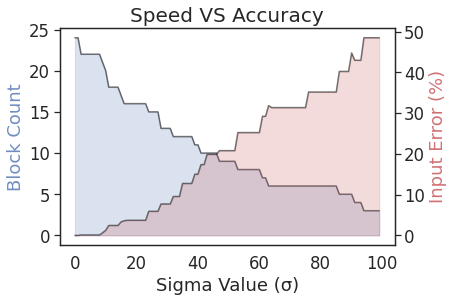

In [70]:
# create figure
fig, ax1 = plt.subplots()
ax1.set_xlabel('Sigma Value (\u03C3)', size=18)
ax1.set_ylabel('Block Count', color='b', alpha=0.8)
ax1.fill_between(sigma, block_num, color='b', alpha=0.2)
ax1.plot(sigma, block_num, color='k', alpha=0.6)

ax2 = ax1.twinx()
ax2.set_ylabel('Input Error (%)', color='r', alpha=0.8) 
ax2.fill_between( sigma, error, color='r', alpha=0.2)
ax2.plot(sigma, error, color='k', alpha=0.6)

# styling figures
sns.set(font_scale=1.5)                                                   
sns.set_style("white")                                                     
plt.title("Speed VS Accuracy", loc="center", size=20) 
plt.show()

# saving results
fig.savefig(save_path + "DC_limit.png")